# Plotting

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Glamdring/MicroCanonicalHMC.jl/examples`


In [2]:
using Revise, Adapt, CMBLensing, CMBLensingInferenceTestProblem, CUDA, JLD2, LaTeXStrings, LinearAlgebra, 
    MCMCChains, MCMCDiagnosticTools, MicroCanonicalHMC, MuseInference, MuseInference, Plots, 
    ProgressMeter, Random, Statistics, Zygote

## Samples

In [3]:
function make_chain(samples::AbstractMatrix)
    return Chains(permutedims(reduce(hcat, [[exp.(sample[end÷2-2:end÷2-1]); sample[end-3:end]] for sample in eachcol(samples) if all(isfinite.(sample))])),
    [:r, :Aϕ, :p_logr, :p_logAϕ, :dE, :logpdf])
end    

make_chain (generic function with 1 method)

In [4]:
#unmasked_muse_samples = load("../chains/MUSE/CMBLensing_masked_NSIDE_64", "chain_muse")

In [5]:
unmasked_hmc_samples = load("../chains/HMC/CMBLensing_unmasked", "_samples_hmc")
#masked_hmc_samples = load("../chains/HMC/CMBLensing_unmasked", "_samples_hmc");

500×12290 Matrix{Float64}:
 2.27363  5.72352  7.28212  5.60674  …  6.08971e-7  -0.98061   -0.306128
 3.24966  6.05584  6.50684  5.46783     6.37681e-7  -1.35673   -0.20467
 2.72993  6.0206   7.56695  5.38947     7.0194e-7   -0.910888  -0.168702
 2.99642  6.16907  6.39489  3.73769     6.50629e-7  -0.671912  -0.23132
 3.00287  5.67181  5.516    5.58874     6.04754e-7  -0.812085  -0.149445
 2.70434  5.59284  6.79704  5.35708  …  2.75497e-7  -1.97705   -0.162286
 2.83575  5.32572  6.38828  5.16798     9.35433e-7  -0.941433  -0.0968699
 2.83217  6.27234  6.20465  4.7634      5.32383e-7  -1.58599   -0.122125
 3.0528   4.79738  8.11765  4.75918     4.88953e-7  -1.33576    0.121211
 4.33141  4.63429  6.95108  4.97541     3.45748e-7  -0.680461  -0.0953543
 3.38376  4.91292  6.79754  3.90394  …  7.86896e-7  -1.24108   -0.0349502
 2.75403  5.07059  7.60064  4.46596     6.9917e-7   -0.945533   0.0587903
 2.481    6.00004  7.10859  3.64061     7.31593e-7  -0.821058   0.0901856
 ⋮                   

In [6]:
unmasked_mchmc_samples = load("../chains/MCHMC/CMBLensing_unmasked_TEV_0.001", "samples");
#masked_mchmc_samples = load("../chains/MCHMC/CMBLensing_masked_TEV_0.0001", "samples");

In [7]:
unmasked_mchmc_chain = make_chain(unmasked_mchmc_samples);
#masked_mchmc_chain = make_chain(masked_mchmc_samples);

In [9]:
ess_hmc = MCMCDiagnosticTools.ess(chain_hmc)[[:r,:Aϕ],:ess]

2-element Vector{Float64}:
 0.061106157694446855
 0.05988863148526571

## Plotting

In [ ]:
d = 12290
esspc_unmasked_mchcm = 0.06 #MCMCDiagnosticTools.ess(unmasked_mchmc_chain)[[:r,:Aϕ],:ess]/10_000
esspc_unmasked_hmc = 
esspc_unmasked_muse = 0.006 

In [7]:
unmasked_mchmc_ess = MCMCDiagnosticTools.ess(unmasked_mchmc_chain)[[:r,:Aϕ],:ess]
unmasked_mchmc_ess_per_call = unmasked_mchmc_ess / 10_000

LoadError: UndefVarError: `unmasked_mchmc_chain` not defined

In [ ]:
masked_mchmc_ess = MCMCDiagnosticTools.ess(masked_mchmc_chain)[[:r,:Aϕ],:ess]
masked_mchmc_ess_per_call = masked_mchmc_ess / 10_000

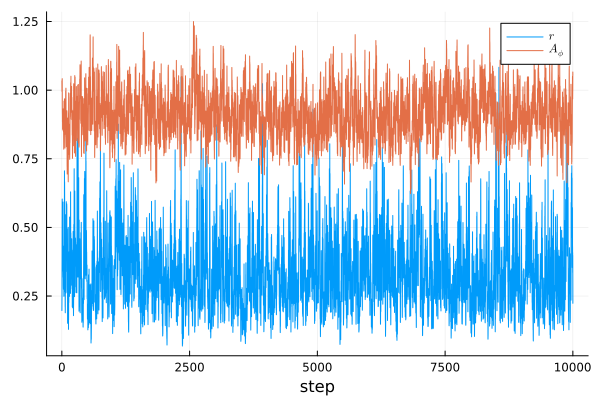

In [10]:
plot(unmasked_mchmc_chain[:r], label=L"r", xlabel="step")
plot!(unmasked_mchmc_chain[:Aϕ], label=L"A_\phi")

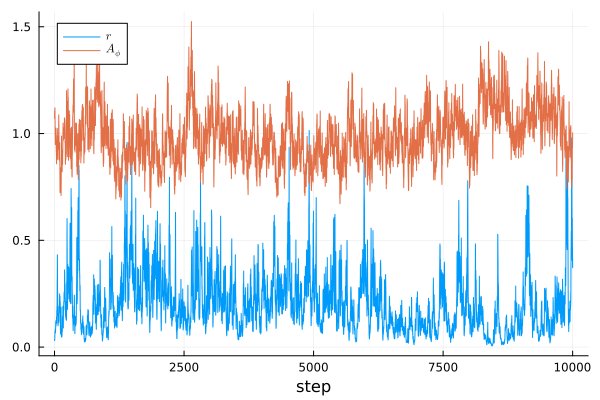

In [11]:
plot(masked_mchmc_chain[:r], label=L"r", xlabel="step")
plot!(masked_mchmc_chain[:Aϕ], label=L"A_\phi")

In [12]:
plot(unmasked_mchmc_chain[:dE]/d, ylabel=L"\mathrm{Energy}/d", xlabel="step", label=nothing)

LoadError: UndefVarError: `unmasked_mchmc_chain` not defined

In [13]:
histogram2d(unmasked_mchmc_chain[:r], unmasked_mchmc_chain[:Aϕ], bins=(40, 40), show_empty_bins=true,
    normalize=:pdf, color=:plasma)
title!("Unmasked - NSIDE=64")
ylabel!("Aϕ")
xlabel!("r")

LoadError: UndefVarError: `unmasked_mchmc_chain` not defined

In [14]:
plot(histogram(unmasked_mchmc_chain[:r], xlabel=L"r", label=nothing, lw=1),
     histogram(unmasked_mchmc_chain[:Aϕ], xlabel=L"A_\phi", label=nothing, lw=1),
     size = (700,300))
plot!(histogram(masked_mchmc_chain[:r], xlabel=L"r", label=nothing, lw=1),
     histogram(masked_mchmc_chain[:Aϕ], xlabel=L"A_\phi", label=nothing, lw=1),
     size = (700,300))

LoadError: UndefVarError: `unmasked_mchmc_chain` not defined